In [1]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

#import machine learning
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC as svm

from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score, roc_auc_score #metrics
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

from sklearn.preprocessing import minmax_scale

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding


In [3]:
# https://www.kaggle.com/kemical/kickstarter-projects

# Columns
# ID - internal kickstarter id
# name - name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
# category - category
# main_category - category of campaign
# currency - currency used to support
# deadline - deadline for crowdfunding
# goal - fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
# launched - date launched
# pledged - amount pledged by "crowd"
# state - Current condition the project is in
# backers - number of backers
# country - country pledged from
# usd pledged - amount of money pledged
# Goal amount in USD

In [4]:
df = pd.read_csv("ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.shape

(378661, 15)

# 1.Data Cleaning

# 1.1.Datatypes

launched,deadline -will fix as datetime types

In [6]:
df.deadline = pd.to_datetime(df.deadline, errors = 'coerce', format="%Y/%m/%d").dt.date
df.launched = pd.to_datetime(df.launched, errors = 'coerce', format="%Y/%m/%d").dt.date 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# 1.2.Null Data

In [8]:
df.isna().sum() 

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [9]:
print ('Missing data in each Kickstarter dataframe column:')
for c in df.columns:
    missing_data = len(df) - df[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print(c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(df))) * 
        100, 3)), '% of total')

Missing data in each Kickstarter dataframe column:
name : 4 missing values is 0.001 % of total
usd pledged : 3797 missing values is 1.003 % of total


In [10]:
df = df.dropna() #dropping null values

# 1.3.Duplicates

In [11]:
df[df['ID'].duplicated() == True] #checking for duplicates in the ID column

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


In [12]:
df[df['name'].duplicated() == True] #checking for duplicates in name column

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
6379,1032645935,Cancelled (Canceled),Design,Design,USD,2015-06-05,100000.0,2015-05-06,3105.0,canceled,17,US,3105.0,3105.00,100000.00
8356,1042208764,The Basement,Horror,Film & Video,USD,2015-05-07,12000.0,2015-04-07,12311.0,successful,106,US,12311.0,12311.00,12000.00
8448,1042642941,The Gift,Film & Video,Film & Video,USD,2013-05-08,3000.0,2013-04-17,3370.0,successful,37,US,3370.0,3370.00,3000.00
8761,1044230780,Redemption,Narrative Film,Film & Video,USD,2012-08-25,11000.0,2012-06-26,11440.0,successful,67,US,11440.0,11440.00,11000.00
9280,1046840222,Quick Quests: TCG,Tabletop Games,Games,USD,2016-09-01,1000.0,2016-08-20,436.0,failed,16,US,304.0,436.00,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378140,997542782,Innocent Sin,Indie Rock,Music,USD,2015-01-25,300.0,2014-12-26,600.0,successful,15,US,600.0,600.00,300.00
378224,997919903,Grassroots,Publishing,Publishing,EUR,2017-09-14,10000.0,2017-08-15,21.0,failed,3,IE,0.0,25.12,11963.01
378426,998836498,The InAction,Camera Equipment,Technology,USD,2016-07-29,80000.0,2016-06-28,670.0,canceled,5,US,410.0,670.00,80000.00
378475,999055513,The Last Hurrah,Rock,Music,USD,2012-06-03,5500.0,2012-05-04,7665.0,successful,69,US,7665.0,7665.00,5500.00


In [13]:
print (len(df[df['name'] == "Cancelled (Canceled)"])) 
print (len(df[df['name'] == "New EP/Music Development"]))
print (len(df[df['name'] == "MFA Thesis Exhibition"]))

10
13
4


some people do not use their fantasy in naming process

# 1.4. Misentered Data

In [14]:
df.country.value_counts() #check country column 

US    292624
GB     33671
CA     14756
AU      7839
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       761
NO       708
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, dtype: int64

# 1.5.Normalization of Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F8CF4BFC8>,
      dtype=object)

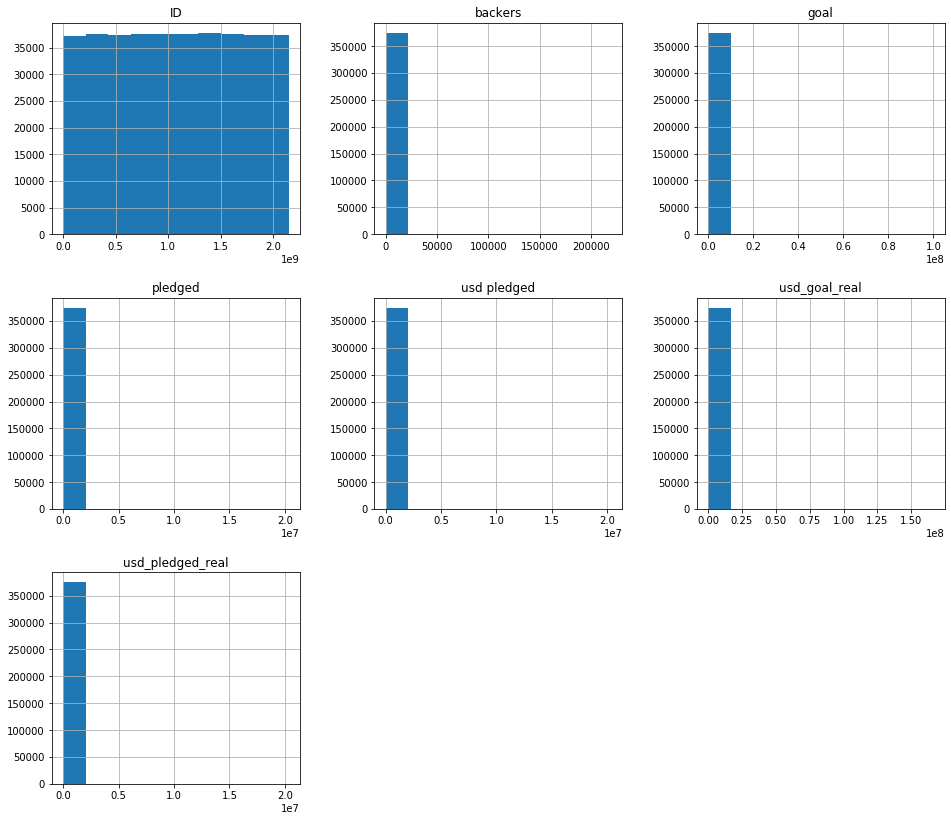

In [15]:
df.hist(figsize=(16,14)) #let's get a better idea of what we're working with here.

In [16]:
# there is no normal distribution
# last 6- all zero-heavy 

In [17]:
zero=(df.backers == 0).sum() 
total=df['ID'].count()
print (zero,'projects from', total ,'have 0 backers')

51811 projects from 374860 have 0 backers


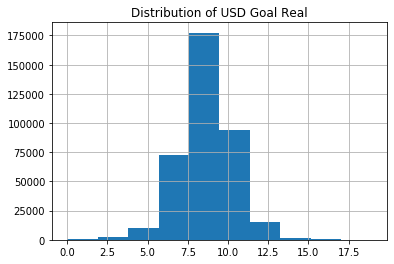

In [18]:
np.log(df.usd_goal_real + 1).hist() #hist of log transformed usd goal real
plt.title("Distribution of USD Goal Real")
plt.show()

The shape of USD goal looks a lot more normal when standardized.
lets transform numerical variables before to classification

In [19]:
df.backers.describe() #getting descriptive statistics

count    374860.000000
mean        106.688366
std         911.710124
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      219382.000000
Name: backers, dtype: float64

In [20]:
df.backers.nlargest(10) # 10 largest values in our backers column

187652    219382
75900     154926
292244    105857
148585     91585
182657     87142
23404      85581
157270     78471
239175     74405
272924     73986
38291      73206
Name: backers, dtype: int64

* the most 3 successfull projects have more than 100.000 backers  


In [21]:
df.loc[187652] #project with highest number of backers

ID                         1955357092
name                Exploding Kittens
category               Tabletop Games
main_category                   Games
currency                          USD
deadline                   2015-02-20
goal                            10000
launched                   2015-01-20
pledged                   8.78257e+06
state                      successful
backers                        219382
country                            US
usd pledged               8.78257e+06
usd_pledged_real          8.78257e+06
usd_goal_real                   10000
Name: 187652, dtype: object

this project has a great success because the viral effect.

# 2.EDA

In [22]:
# Seaborn visualization library
# import seaborn as sns
# sns.pairplot(df)

# 2.1 State

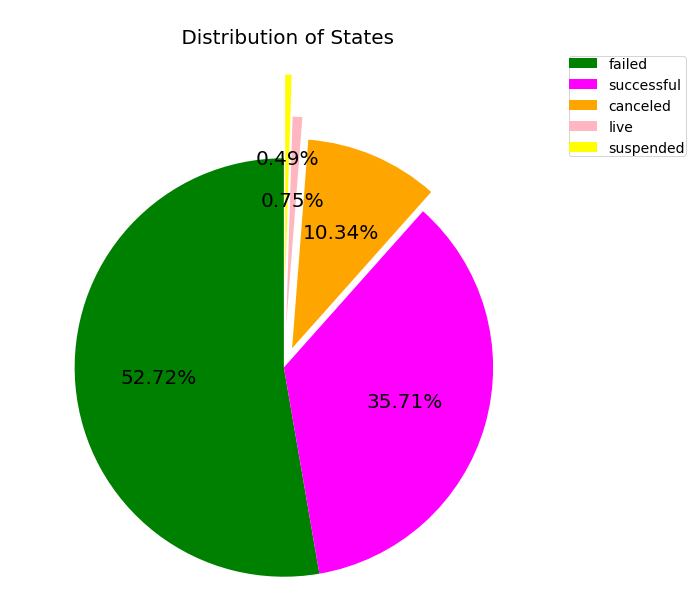

In [23]:
state = df.state.value_counts() 

labels = state.index 
sizes = state.values 
colors = ['Green','Magenta','Orange','LightPink','Yellow', 'SkyBlue'] 
explode = [0,0,.1,.2, .4]

fig1, ax1 = plt.subplots(figsize = (8, 8)) 

patches, texts, autotext = ax1.pie(sizes, colors = colors, startangle=90, autopct='%0.2f%%', explode = explode,
 textprops={'fontsize': 20}) 

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels,loc= 2,borderpad=0.05, fontsize = 14, bbox_to_anchor=(1,1)) 
plt.title('\n Distribution of States', fontsize = 20) #title

plt.show()

* We see that most kickstarters fail. 
* It looks like the 2 most common states Failed and Successful can account for most of the data, so we will continue concentrating mostly on them.

In [24]:
df = df[df.state != "live"]
df = df[df.state != "canceled"] 
df = df[df.state != "suspended"] 
# deletting other states


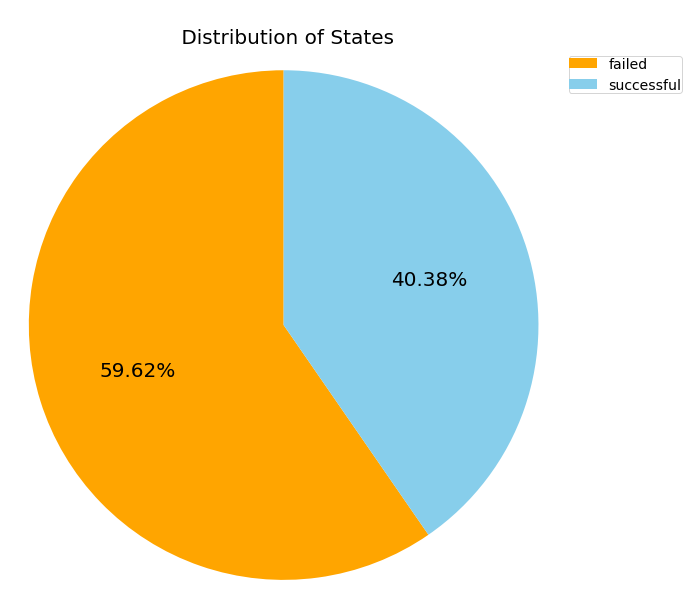

In [25]:
state = df.state.value_counts() 

labels = state.index 
sizes = state.values 
colors = ['Orange', 'SkyBlue'] 
explode = [0,0]

fig1, ax1 = plt.subplots(figsize = (8, 8)) 

patches, texts, autotext = ax1.pie(sizes, colors = colors, startangle=90, autopct='%0.2f%%', explode = explode,
 textprops={'fontsize': 20}) 

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels,loc= 2,borderpad=0.05, fontsize = 14, bbox_to_anchor=(1,1)) 
plt.title('\n Distribution of States', fontsize = 20) #title

plt.show()

In [26]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224,US,52375.0,52375.0,50000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20,154.0,failed,4,US,0.0,154.0,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13,200.0,failed,6,US,200.0,200.0,15000.00


# 2.2 Main category

In [27]:
cats=len(df.main_category.unique())
print(cats, 'Main categories are in our dataset')

15 Main categories are in our dataset


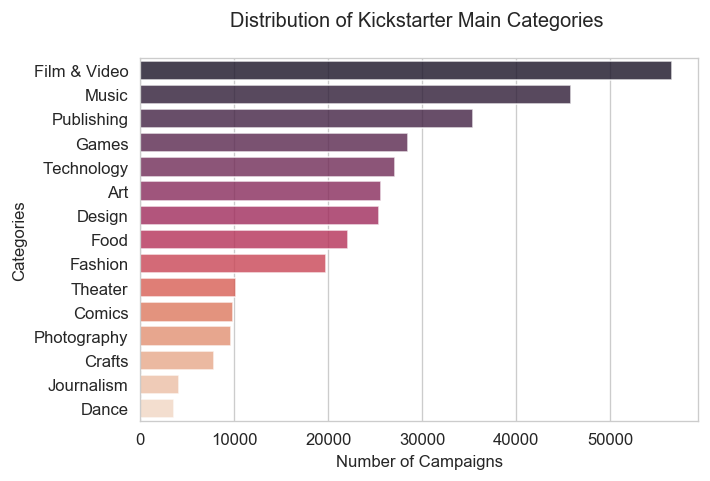

In [28]:
sns.set_style('whitegrid')
maincat = df.main_category.value_counts() 

fig = plt.figure(dpi=120) 
ax = fig.add_subplot(111)
ax = sns.barplot(y=maincat.index, x=maincat.values, palette="rocket", alpha=0.8)

plt.title('Distribution of Kickstarter Main Categories \n') 
ax.set(xlabel='Number of Campaigns', ylabel='Categories') 
plt.show()

* Most popular categories: Film/Video, Music, and Publishing
* It has not normal distribution, so we will try to do something with it in Feature Engineering part.

(-1, 15)

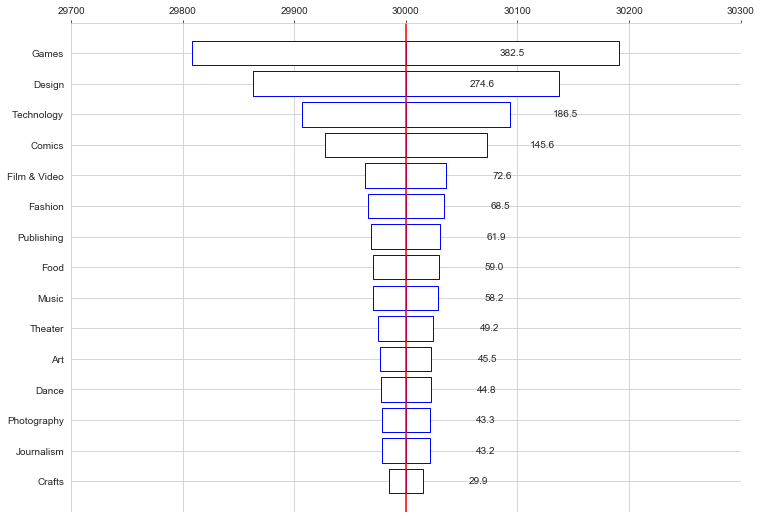

In [29]:
import numpy as np
from matplotlib import pyplot as plt

###############################################################################
# The data (change all of this to your actual data, this is just a mockup)
variables = [
  'Games' ,
"Design",
'Technology',
'Comics' ,
'Film & Video',
'Fashion',
'Publishing' ,   
'Food' ,
'Music', 
'Theater' ,
"Art" ,
'Dance',
'Photography',
'Journalism',  
'Crafts'
]


base = 30000

lows = np.array([
    base - 382.5/2,
    base - 274.6/2,
    base - 186.5/2,
    base - 145.6/2,
    base - 72.6/2,
    base - 68.5/2,
    base - 61.9/2,
    base - 59.0/2,
    base - 58.2/2,
    base - 49.2/2,
    base - 45.5/2,
    base - 44.8/2,
    base - 43.3/2,
    base - 43.2/2,
    base - 29.9/2,
])

values = np.array([
    382.5,
    274.6,
    186.5,
    145.6,
    72.6,
    68.5,
    61.9,   
    59.0,
    58.2, 
    49.2,
    45.5,
    44.8,
    43.3,
    43.2,  
    29.9
])



###############################################################################
# The actual drawing part

# The y position for each variable
ys = range(len(values))[::-1]  # top to bottom
fig,ax = plt.subplots(figsize=(12,9))
# Plot the bars, one by one
for y, low, value in zip(ys, lows, values):
    # The width of the 'low' and 'high' pieces
    low_width = base - low
    high_width = low + value - base

    # Each bar is a "broken" horizontal bar chart
    plt.broken_barh(
        [(low, low_width), (base, high_width)],
        (y - 0.4, 0.8),
        facecolors=['white', 'white'],  # Try different colors if you like
        edgecolors=['blue', 'blue'],
        linewidth=1,
        
    )

    # Display the value as text. It should be positioned in the center of
    # the 'high' bar, except if there isn't any room there, then it should be
    # next to bar instead.
    x = base + high_width / 2
    if x <= base + 50:
        x = base + high_width + 50
    plt.text(x, y, str(value), va='center', ha='center')
    
# Draw a vertical line down the middle
plt.axvline(base, color='red')

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables)

# Set the portion of the x- and y-axes to show
plt.xlim(base - 300, base +300)
plt.ylim(-1, len(variables))

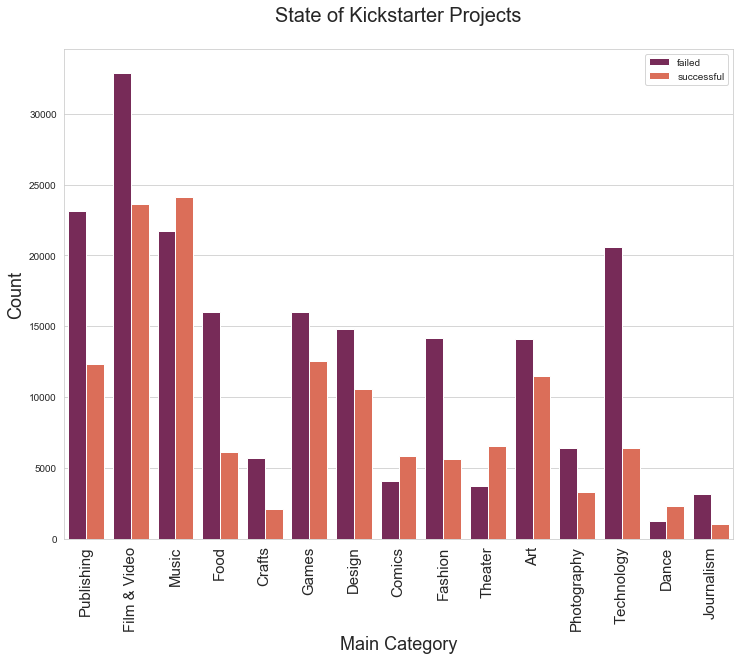

In [30]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(12,9))

sns.countplot(df['main_category'],hue=df['state'], palette="rocket")

plt.title('State of Kickstarter Projects\n',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel('Main Category',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.legend(loc=1)
plt.show()

In [31]:
for i in df['main_category'].unique():
    '''
    str round [('successful') & ('category')] / (number in category) * 100
    '''
    print(i + ' category success rate: {}%'.format(str(round(len(df[(df['state']=='successful') & (df['main_category']==i)]) / len(df[df['main_category']==i])*100))))

Publishing category success rate: 35%
Film & Video category success rate: 42%
Music category success rate: 53%
Food category success rate: 28%
Crafts category success rate: 27%
Games category success rate: 44%
Design category success rate: 42%
Comics category success rate: 59%
Fashion category success rate: 28%
Theater category success rate: 64%
Art category success rate: 45%
Photography category success rate: 34%
Technology category success rate: 24%
Dance category success rate: 65%
Journalism category success rate: 24%


* Dance (65% success), Theater (64% success), and Comics(59% success) are the true champions of Kickstarter by success percentage. 
* Technology (24% success) and Journalism (24% success)have the lowest success.

#  2.3 Category(subcategory)

In [32]:
subcats=len(df.category.unique())
print(subcats, 'subcategories in our dataset')

159 subcategories in our dataset


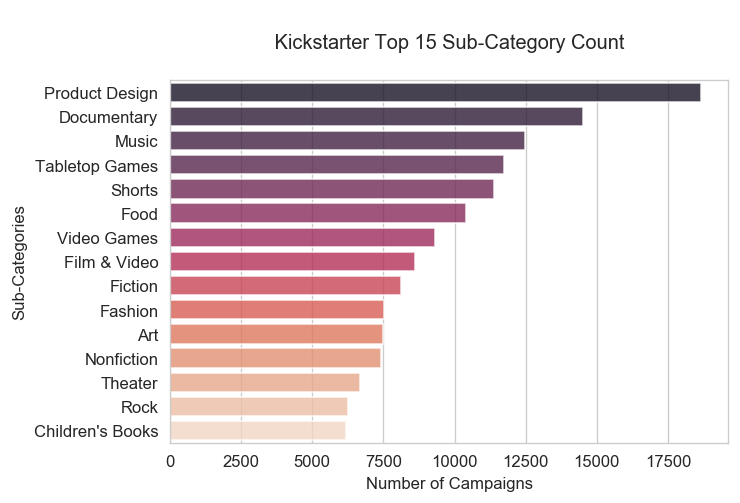

In [33]:
subcat = df.category.value_counts().head(15) 
fig = plt.figure(dpi=120) 
ax = fig.add_subplot(111) 
ax = sns.barplot(y=subcat.index, x=subcat.values,palette="rocket", alpha=0.8) 

plt.title('\n Kickstarter Top 15 Sub-Category Count \n')
ax.set(xlabel='Number of Campaigns', ylabel='Sub-Categories') 
plt.show()

* Here most popular categories: Product Design, Documentary, Music.
* These graphs are imbalance, a lot of people have the same favorites.
* Feature 'category' we will not use in our model. Main Category will be anough.


# 2.4 Сurrency

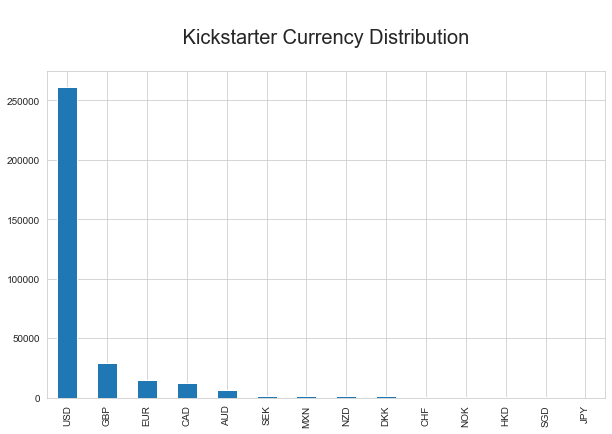

In [34]:
df['currency'].value_counts().plot.bar(figsize=(10,6)) 
plt.title('\n Kickstarter Currency Distribution \n', fontsize = 20) 
plt.show()

# 2.5 Сountry

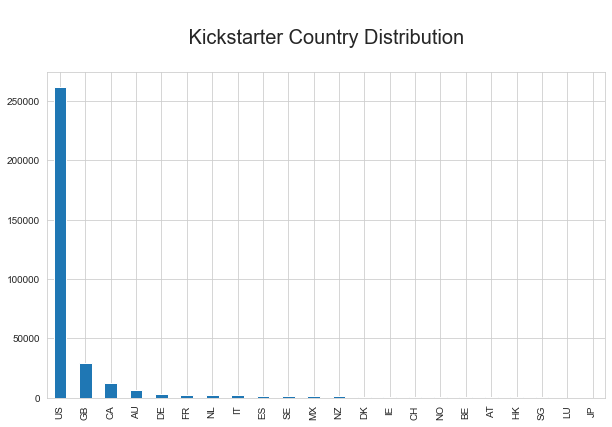

In [35]:
df.country.value_counts().plot.bar(figsize=(10,6)) 
plt.title('\n Kickstarter Country Distribution \n', fontsize = 20) 
plt.show()

* The US definitely has the most Kickstarter campaigns, so it makes sense that the USD also dominates all other currencies in terms of Kickstarters. 
* Since Kickstarter was started in the US, this does not come as a surprise. 

# 2.6 Duration and best time to launch

In [36]:
df['duration_days'] = (df['deadline'] - df['launched']).dt.days

* creating column based on the length of the project

In [37]:
fail = df.loc[df.state=='failed'] #unsuccessful campaigns
success = df.loc[df.state=='successful'] #successful campaigns

In [38]:
#calculating averages for duration
print('Average Duration (in days) of Failed Kickstarters:',fail['duration_days'].mean())
print('Average Duration (in days) of Successful Kickstarters:',success['duration_days'].mean())

Average Duration (in days) of Failed Kickstarters: 35.174585422876255
Average Duration (in days) of Successful Kickstarters: 32.15671903833367


* Most kickstarters stay up for about 5 weeks. 
* This means that after a month, you can make some prediction whether or not your kickstarter will take off. 
* Interesting fact that there is not a huge difference in duration between successful and unsuccessful campaigns.

In [39]:
df['duration_days'].describe()

count    331462.000000
mean         33.955910
std          12.714067
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: duration_days, dtype: float64

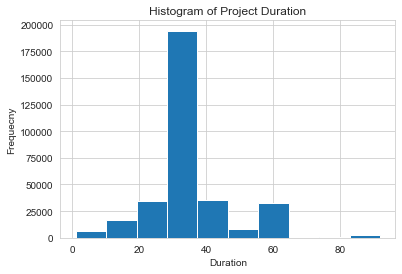

In [40]:
# Plot histogram of 'duration' column
plt.hist(df['duration_days'])
plt.xlabel('Duration')
plt.ylabel('Frequecny')
plt.title('Histogram of Project Duration')
plt.show()

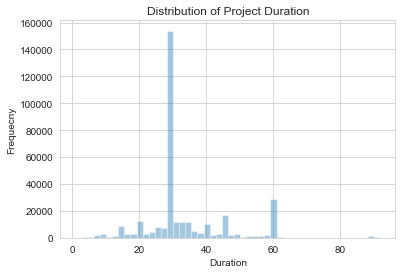

In [41]:
# Plot distribution plot of 'duration' column
sns.distplot(df['duration_days'], kde=False)
plt.xlabel('Duration')
plt.ylabel('Frequecny')
plt.title('Distribution of Project Duration')
plt.show()

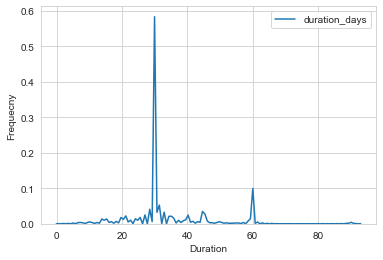

In [42]:
# Plot kde of 'duration' column
sns.kdeplot(df['duration_days'])
plt.xlabel('Duration')
plt.ylabel('Frequecny')
plt.show()


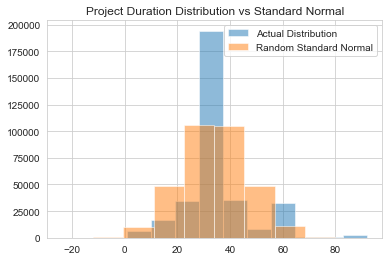

In [43]:
# Create normal distribution to overlay on top of actual distribution
duration_rand_normal = np.random.normal(loc=df['duration_days'].mean(), scale=df['duration_days'].std(), size=len(df['duration_days']))
# Overlay standard normal distribution over actual distribution
plt.hist(df['duration_days'], alpha=0.5, label='Actual Distribution')
plt.hist(duration_rand_normal, alpha=0.5, label='Random Standard Normal')
plt.legend(loc='upper right')
plt.title('Project Duration Distribution vs Standard Normal')
plt.show()

In [44]:
# Convert 'duration' column to NumPy array
duration_test = np.array(df['duration_days'])
# k = z-score, p = p-value
k,p = stats.mstats.normaltest(duration_test)
# If statement to print results of p-test
if p < 0.05:
    print ('P-value =', p, '\nZ-score =', k, '\nDistribution is not normal.')
else:
    print ('P-value =', p, '\nZ-score =', k, '\nDistribution is normal')

P-value = 0.0 
Z-score = 74627.79028156077 
Distribution is not normal.


In [45]:
df['launch_year']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.year 
df['launch_month']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.month 
df['launch_day']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.dayofweek

* creating column based on launch year
* creating column based on launch month
* creating column based on launch day of week

In [46]:
df.launch_year.describe() #year distribution 

count    331462.000000
mean       2014.178995
std           1.931006
min        2009.000000
25%        2013.000000
50%        2014.000000
75%        2016.000000
max        2017.000000
Name: launch_year, dtype: float64

In [47]:
df.launch_year.nsmallest(10) # let's check out the minimum values here

267     2009
357     2009
1293    2009
1992    2009
2329    2009
2763    2009
3255    2009
3434    2009
3541    2009
4073    2009
Name: launch_year, dtype: int64

*  Kickstarter was founded in 2009, so lets get rid of 1970

In [48]:
df = df[df.launch_year >= 1971] 

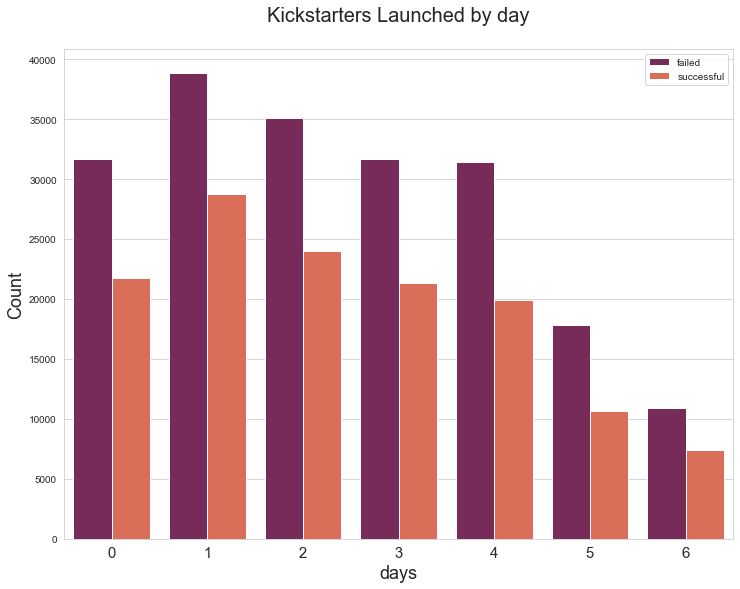

In [49]:
fig,ax = plt.subplots(figsize=(12,9))
sns.countplot(df['launch_day'],hue=df['state'],palette="rocket")
plt.title('Kickstarters Launched by day\n',fontsize=20)
plt.xticks(rotation=1,fontsize=15)
plt.xlabel('days',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.legend(loc=1)
plt.show()

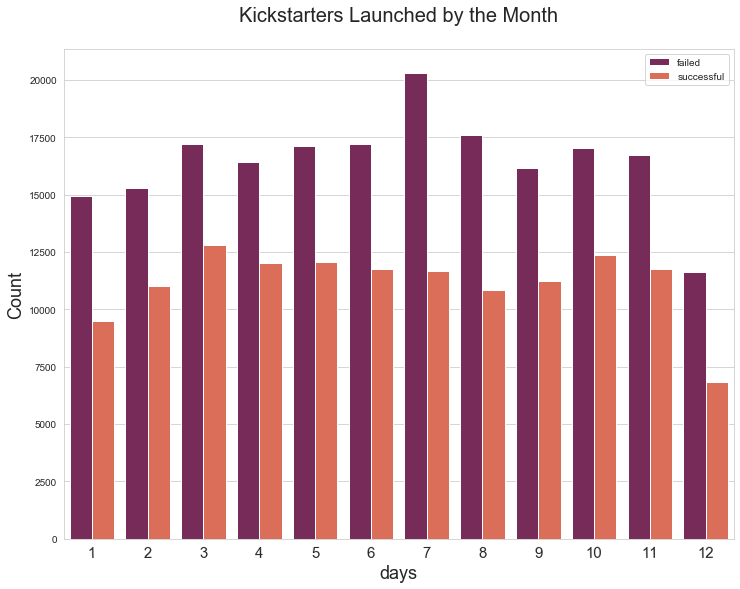

In [50]:
fig,ax = plt.subplots(figsize=(12,9))
sns.countplot(df['launch_month'],hue=df['state'],palette="rocket")
plt.title('Kickstarters Launched by the Month\n',fontsize=20)
plt.xticks(rotation=1,fontsize=15)
plt.xlabel('days',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.legend(loc=1)
plt.show()

In [51]:
df.groupby(['state']).size()

state
failed        197611
successful    133851
dtype: int64

# 2.7 Backers

In [52]:
df['backers'].describe()

count    331462.000000
mean        116.456315
std         965.732911
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64

* THe lower 25% is 2, the median is 116, the 75% is 63 and the max is a whopping 219382! A standard deviation of 965 show us that the uniform is far from uniform. 
* Let's clean up the outliers so we can see the distribution more clearly.

In [53]:
print('Average Number of Backers of Failed Kickstarters:',fail['backers'].mean()) 
print('Average Number of Backers of Successful Kickstarters:',success['backers'].mean())


Average Number of Backers of Failed Kickstarters: 16.431236115398434
Average Number of Backers of Successful Kickstarters: 264.12839650058646


* The more backers, the more successful a campaign will obviously be
* It's interesting that the number of backers for successful campaigns about 16 times higher
* That number is probably inflated because of the super successful campaigns go viral

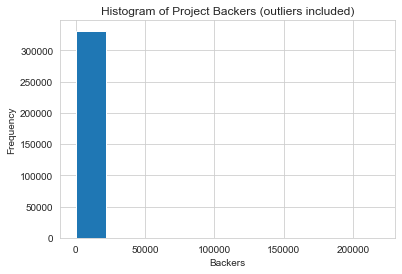

In [54]:
# Histogram of 'backers' column
plt.hist(df['backers'])
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Histogram of Project Backers (outliers included)')
plt.show()

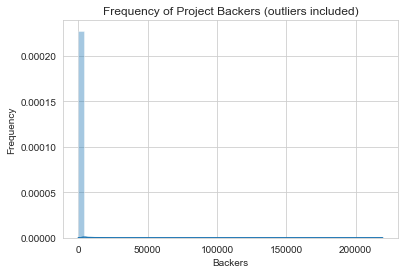

In [55]:
# Distribution plot of 'backers' column
sns.distplot(df['backers'])
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Frequency of Project Backers (outliers included)')
plt.show()

* the above plots are a histogram and a distribution plot of kickstarter backers. It's not very clear. There is huge number of projects that receive almost no backers. This would indicate that distribution of kickstarter backers is strongly positive (right-skewed & left leaning). 
* let's look more into this.

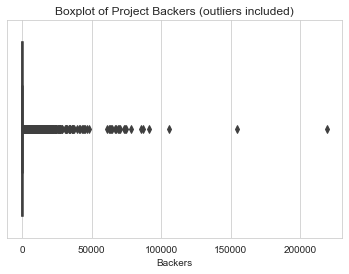

In [56]:
# Boxplot of'backers' column
sns.boxplot(x=df['backers'])
plt.xlabel('Backers')
plt.title('Boxplot of Project Backers (outliers included)')
plt.show()

* The boxplot above further proves this skewness. 
* The box (quartiles) is almost not even visible. 
* It appears as a black smudge to the far left of the chart. 
* The extreme outliers are making this data extremely hard to see. 
* Let's look at the numbers and see just how bad the skew is.

In [57]:
df['backers'].describe()

count    331462.000000
mean        116.456315
std         965.732911
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64

In [58]:
# Filter the original kickstarter dataframe to remove lots of outliers
filtered_df = df[((df.backers - df.backers.mean()) / df.backers.std()).abs() < .099]
filtered_df['backers'].describe()

count    120397.000000
mean         72.286303
std          47.242509
min          21.000000
25%          35.000000
50%          57.000000
75%          98.000000
max         212.000000
Name: backers, dtype: float64

The above summary statistics show that the data has been significantly filtered from statistical outliers. Let's check a box plot next.

In [59]:
df_a=filtered_df

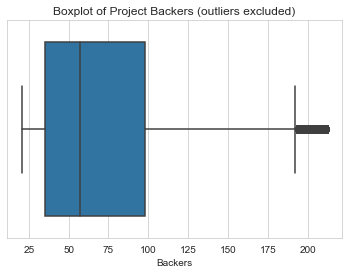

In [60]:
sns.boxplot(x=filtered_df['backers'])
plt.xlabel('Backers')
plt.title('Boxplot of Project Backers (outliers excluded)')
plt.show()

The box plot above shows the extent of the filtering.

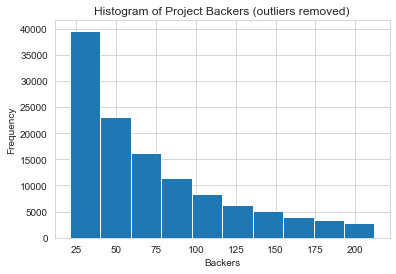

In [61]:
# Histogram of filtered 'backers' column
plt.hist(filtered_df['backers'])
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Histogram of Project Backers (outliers removed)')
plt.show()

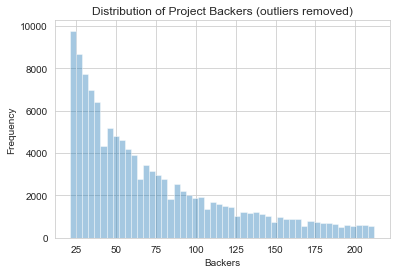

In [62]:
# distribution plot of filtered 'backers' column
sns.distplot(filtered_df['backers'], kde=False)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Distribution of Project Backers (outliers removed)')
plt.show()

The histogram above now shows the strongly positive (right-skewed & left leaning) distribution in a way that's easier to understand.

In [63]:
df.groupby(['state']).size()

state
failed        197611
successful    133851
dtype: int64

In [64]:
filtered_df.groupby(['state']).size()

state
failed        31820
successful    88577
dtype: int64

# 2.8 Pledged(usd_pledged_real)

In [65]:
df_a['usd_pledged_real'].describe()

count    120397.000000
mean       6527.549862
std        9729.534842
min          26.280000
25%        2008.240000
50%        3900.000000
75%        7708.240000
max      636683.000000
Name: usd_pledged_real, dtype: float64

In [66]:
print('Average Pledged of Failed Kickstarters:',fail['usd_pledged_real'].mean()) 
print('Average Pledged of Successful Kickstarters:',success['usd_pledged_real'].mean())


Average Pledged of Failed Kickstarters: 1321.102820642584
Average Pledged of Successful Kickstarters: 22664.485818335666


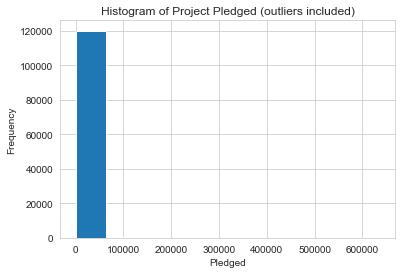

In [67]:
# Histogram of 'backers' column
plt.hist(df_a['usd_pledged_real'])
plt.xlabel('Pledged')
plt.ylabel('Frequency')
plt.title('Histogram of Project Pledged (outliers included)')
plt.show()

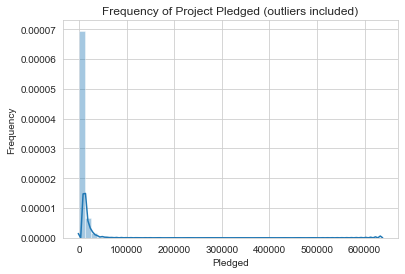

In [68]:
# Distribution plot of 'backers' column
sns.distplot(df_a['usd_pledged_real'])
plt.xlabel('Pledged')
plt.ylabel('Frequency')
plt.title('Frequency of Project Pledged (outliers included)')
plt.show()

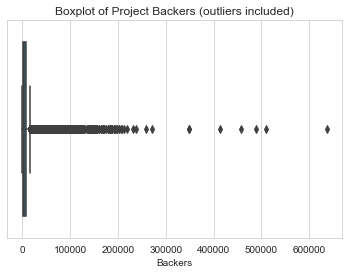

In [69]:
# Boxplot of'backers' column
sns.boxplot(x=df_a['usd_pledged_real'])
plt.xlabel('Backers')
plt.title('Boxplot of Project Backers (outliers included)')
plt.show()

In [70]:
df_a.groupby(['state']).size()

state
failed        31820
successful    88577
dtype: int64

In [71]:
df_a['usd_pledged_real'].describe()

count    120397.000000
mean       6527.549862
std        9729.534842
min          26.280000
25%        2008.240000
50%        3900.000000
75%        7708.240000
max      636683.000000
Name: usd_pledged_real, dtype: float64

In [72]:
# Filter the original kickstarter dataframe to remove lots of outliers
filtered_df2 = df_a[((df_a.usd_pledged_real - df_a.usd_pledged_real.mean()) / df_a.usd_pledged_real.std()).abs() < .099]
filtered_df2['usd_pledged_real'].describe()

count    11931.000000
mean      6421.745807
std        546.757361
min       5564.330000
25%       5975.965000
50%       6360.000000
75%       6880.000000
max       7490.430000
Name: usd_pledged_real, dtype: float64

In [73]:
df_a=filtered_df2 

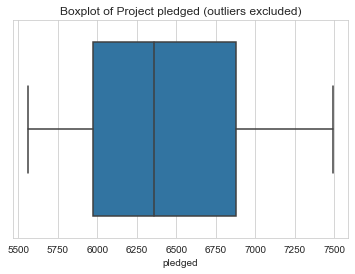

In [74]:
sns.boxplot(x=df_a['usd_pledged_real'])
plt.xlabel('pledged')
plt.title('Boxplot of Project pledged (outliers excluded)')
plt.show()

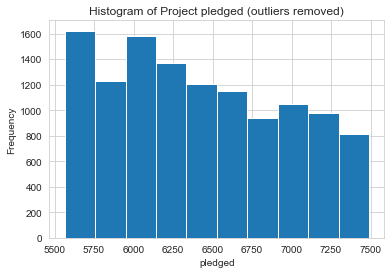

In [75]:
# Histogram of filtered 'backers' column
plt.hist(df_a['usd_pledged_real'])
plt.xlabel('pledged')
plt.ylabel('Frequency')
plt.title('Histogram of Project pledged (outliers removed)')
plt.show()

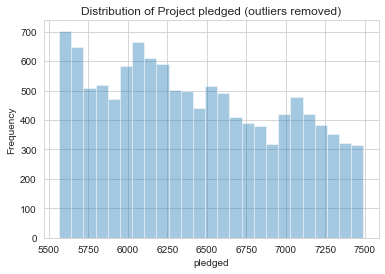

In [76]:
# distribution plot of filtered 'backers' column
sns.distplot(df_a['usd_pledged_real'], kde=False)
plt.xlabel('pledged')
plt.ylabel('Frequency')
plt.title('Distribution of Project pledged (outliers removed)')
plt.show()

In [77]:
df.groupby(['state']).size()

state
failed        197611
successful    133851
dtype: int64

In [78]:
df_a.groupby(['state']).size()

state
failed        2404
successful    9527
dtype: int64

In [79]:
df_a

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration_days,launch_year,launch_month,launch_day
108,1000445513,Bold Threadz,Fashion,Fashion,USD,2012-09-20,5400.0,2012-08-02,5858.0,successful,131,US,5858.0,5858.0,5400.0,49,2012,8,3
243,1001064677,Equinox: my first comic (genre: fantasy),Comics,Comics,USD,2011-06-04,5150.0,2011-04-25,5965.5,successful,97,US,5965.5,5965.5,5150.0,40,2011,4,0
248,1001093391,The Great Kentucky Goblin Spree,Film & Video,Film & Video,USD,2014-03-21,5500.0,2014-02-19,6614.0,successful,88,US,6614.0,6614.0,5500.0,30,2014,2,2
249,1001097057,Help Put Community-Building Art in Austin's Pa...,Public Art,Art,USD,2017-04-13,5000.0,2017-03-08,7259.0,successful,26,US,300.0,7259.0,5000.0,36,2017,3,2
351,1001576108,Light Comes In,Music,Music,USD,2016-06-25,7000.0,2016-05-28,7453.0,successful,138,US,7336.0,7453.0,7000.0,28,2016,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378542,999367060,An original country music ep from The Weal and...,Country & Folk,Music,USD,2011-08-24,6200.0,2011-07-25,6747.0,successful,92,US,6747.0,6747.0,6200.0,30,2011,7,0
378602,999696660,Objects Attack!,Narrative Film,Film & Video,USD,2011-08-04,5500.0,2011-07-05,6023.0,successful,79,US,6023.0,6023.0,5500.0,30,2011,7,1
378613,999762532,Traverse City Dance Project 2012,Dance,Dance,USD,2012-05-18,7000.0,2012-04-08,7120.0,successful,75,US,7120.0,7120.0,7000.0,40,2012,4,6
378639,999884445,Superette Tea - Boldly Caffeinated Loose Leaf Tea,Drinks,Food,USD,2015-12-03,5000.0,2015-11-03,5579.0,successful,103,US,5579.0,5579.0,5000.0,30,2015,11,1


# CANCEL this step!!!!Removing outliers

In [80]:
# df_clean=df.copy() #creating a copy of dataframe 

In [81]:
# df_clean.info()

In [82]:
# q = df_clean["backers"].quantile(0.75)
# # and then filter with:
# q

In [83]:
# df_clean=df_clean[df_clean["backers"] < q]

In [84]:
# df_clean.info()

In [85]:
# q2 = df_clean["usd_pledged_real"].quantile(0.85)
# # and then filter with:
# q2

In [86]:
# df_clean=df_clean[df_clean["backers"] < q2]

In [87]:
# df_clean.info()

In [88]:
# # Seaborn visualization library
# import seaborn as sns
# # Create the default pairplot
# sns.pairplot(df)

# Feature Engineering and Selection

In [89]:
df_final=df_a.copy() #creating a copy of dataframe 

In [90]:
df_final['US'] = np.where(df_final.country=='US', 1, 0) #creating feature to indictate whether project was made in US or not

* Since we have way more data on US kickstarters than any other country, its better to create a feature divides the set into US kickstarters and kickstarters from other countries to help balance our country data out.

In [91]:
df_final['successful'] = np.where(df_final.state == 'successful', 1, 0) #denotes whether campaign was sucessful or not

* Lets add a column to the dataframe to reflect whether or not a campaign was successful.

In [92]:
to_drop= ['ID','name',"category","currency", "deadline", "goal",
          "launched", "launch_year", "backers", "usd pledged", "usd_pledged_real", "country","state", "pledged"]
#dropping list of columns from final_df
df_final.drop(to_drop, axis=1, inplace=True)

In [93]:
df_final.nunique() 

main_category      15
usd_goal_real    2431
duration_days      87
launch_month       12
launch_day          7
US                  2
successful          2
dtype: int64

In [94]:
df_final.groupby(['successful']).size()

successful
0    2404
1    9527
dtype: int64

In [95]:
df_final.groupby(['main_category']).size()

main_category
Art              792
Comics           460
Crafts           127
Dance            217
Design          1000
Fashion          520
Film & Video    2349
Food             678
Games            888
Journalism        73
Music           2346
Photography      251
Publishing      1171
Technology       556
Theater          503
dtype: int64

In [96]:
# Map 'main_category' column into their weight and make new column
category_weight = {
'Games': 382.5,
"Design":274.6,
'Technology':186.5,
'Comics': 145.6,
'Film & Video':72.6,
'Fashion':68.5,
'Publishing': 61.9,   
'Food': 59.0,
'Music':58.2, 
'Theater': 49.2,
"Art": 45.5,
'Dance': 44.8,
'Photography':43.3,
'Journalism': 43.2,  
'Crafts': 29.9}     
 
df_final['category_weight'] =df_final['main_category'].map(category_weight)

In [97]:
df_final.head(4)

,main_category,usd_goal_real,duration_days,launch_month,launch_day,US,successful,category_weight
108,Fashion,5400.0,49,8,3,1,1,68.5
243,Comics,5150.0,40,4,0,1,1,145.6
248,Film & Video,5500.0,30,2,2,1,1,72.6
249,Art,5000.0,36,3,2,1,1,45.5


In [98]:
df_final = df_final.drop(['main_category'], axis=1)

# Scaling (usd_goal_real)

Text(0.5, 1.0, 'Scaled data')

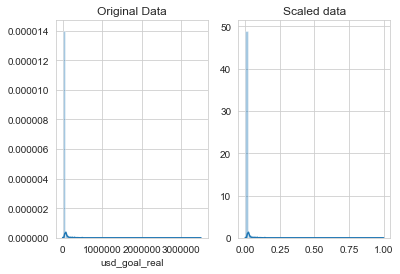

In [99]:
# select the usd_goal_real column
usd_goal = df_final.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_final.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [100]:
df_final.usd_goal_real=scaled_data

Text(0.5, 1.0, 'Scaled data')

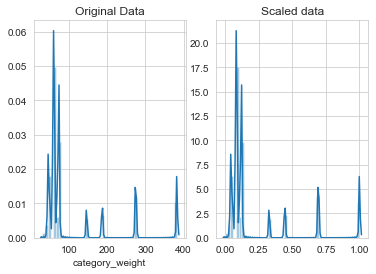

In [101]:
# select the usd_goal_real column
category_weight = df_final.category_weight

# scale the goals from 0 to 1
scaled_data = minmax_scaling(category_weight, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_final.category_weight, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

we can see that scaling changed the scales of the plots dramatically (but not the shape of the data: it looks like most campaigns have small goals but a few have very large ones)

In [102]:
df_final.category_weight=scaled_data

In [103]:
df_final

,usd_goal_real,duration_days,launch_month,launch_day,US,successful,category_weight
108,0.001543,49,8,3,1,1,0.109472
243,0.001471,40,4,0,1,1,0.328134
248,0.001571,30,2,2,1,1,0.121100
249,0.001428,36,3,2,1,1,0.044243
351,0.002000,28,5,5,1,1,0.080261
...,...,...,...,...,...,...,...
378542,0.001771,30,7,0,1,1,0.080261
378602,0.001571,30,7,1,1,1,0.121100
378613,0.002000,40,4,6,1,1,0.042258
378639,0.001428,30,11,1,1,1,0.082530


# Correlation matrix

In [104]:
df_final.groupby(['successful']).size()

successful
0    2404
1    9527
dtype: int64

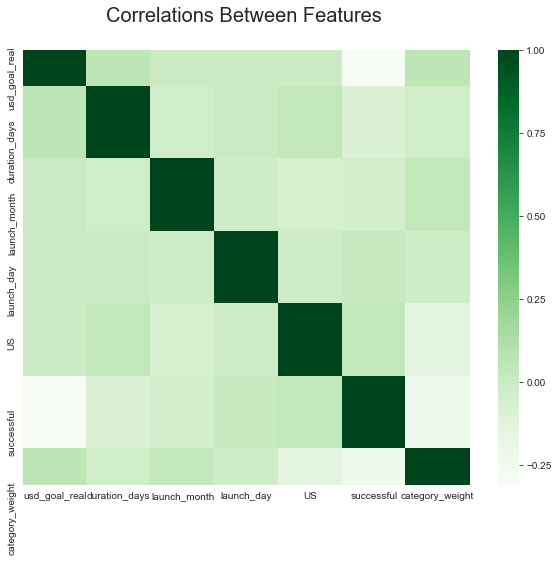

In [105]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(df_final.corr(), cmap='Greens', ax=ax)

plt.title('Correlations Between Features \n', fontsize = 20)
plt.show()

# Model 1. LogisticRegression

In [106]:
X = df_final.drop(['successful']
y = df_final.successful

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=X['category_weight'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.10,)
print(f'Shape train: {X_train.shape}')
print(f'Shape valid: {X_val.shape}')
print(f'Shape test: {X_test.shape}')


Shape train: (8589, 6)
Shape valid: (955, 6)
Shape test: (2387, 6)


In [108]:
%%time 
#using the time function to see how long it takes each classifier to run

# declare a logistic regression classifier
lr = LogisticRegression(random_state=0) #liblinear supports l2 regularization

# Fit the model
fit = lr.fit(X_train, y_train)

pred_y = lr.predict(X_test) 

lrs = round(lr.score(X_test, y_test)*100,2) #format accuracy score
print('\nAccuracy Percentage:', lrs)

#y_score = logreg.fit(X_res, y_res).decision_function(X_res)
#y_pred = logreg.fit(X_res, y_res).predict(X_test)


Accuracy Percentage: 80.1
Wall time: 218 ms


In [109]:
print('\nActual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y))


Actual vs. Predicted 

Predicted   0     1   All
True                     
0          15   468   483
1           7  1897  1904
All        22  2365  2387



               precision    recall  f1-score   support

           0       0.68      0.03      0.06       483
           1       0.80      1.00      0.89      1904

    accuracy                           0.80      2387
   macro avg       0.74      0.51      0.47      2387
weighted avg       0.78      0.80      0.72      2387



In [110]:
CM = confusion_matrix(y_test, pred_y)
CM

array([[  15,  468],
       [   7, 1897]], dtype=int64)

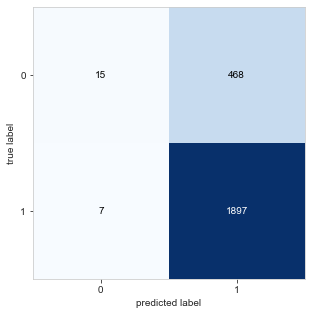

In [111]:
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))

LogReg: 1.000000 (+/- 0.000000)
XGBClassifier: 0.999417 (+/- 0.000545)
DecisionTreeClassifier: 0.996211 (+/- 0.002368)
RandomForestClassifier: 0.999563 (+/- 0.000583)
GradientBoostingClassifier: 0.999126 (+/- 0.000714)
RidgeClassifier: 0.999563 (+/- 0.000357)
BaggingRidgeClassifier: 0.998543 (+/- 0.000799)
ExtraTreesClassifier: 0.996357 (+/- 0.001784)


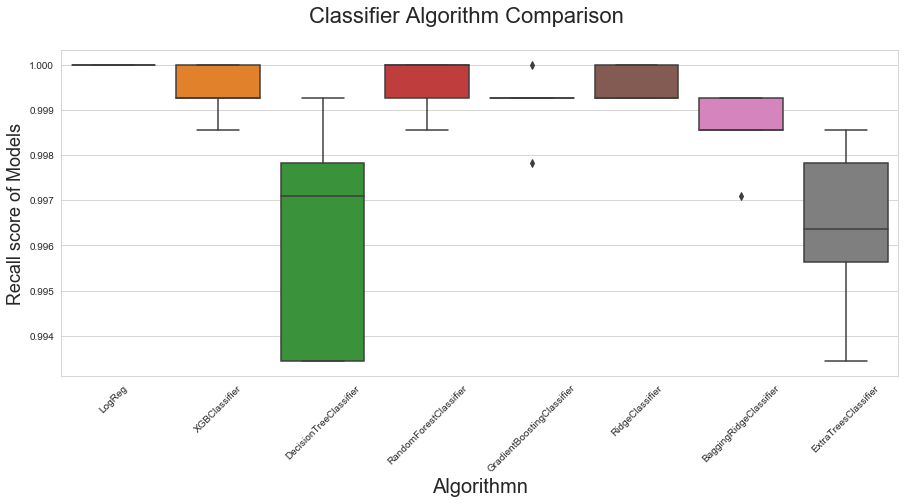

In [112]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'recall'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Recall score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

LogReg: 0.973455 (+/- 0.005415)
XGBClassifier: 0.997788 (+/- 0.001002)
DecisionTreeClassifier: 0.995226 (+/- 0.001855)
RandomForestClassifier: 0.997904 (+/- 0.001254)
GradientBoostingClassifier: 0.997438 (+/- 0.001408)
RidgeClassifier: 0.815698 (+/- 0.014507)
BaggingRidgeClassifier: 0.997089 (+/- 0.001563)
ExtraTreesClassifier: 0.986960 (+/- 0.002564)


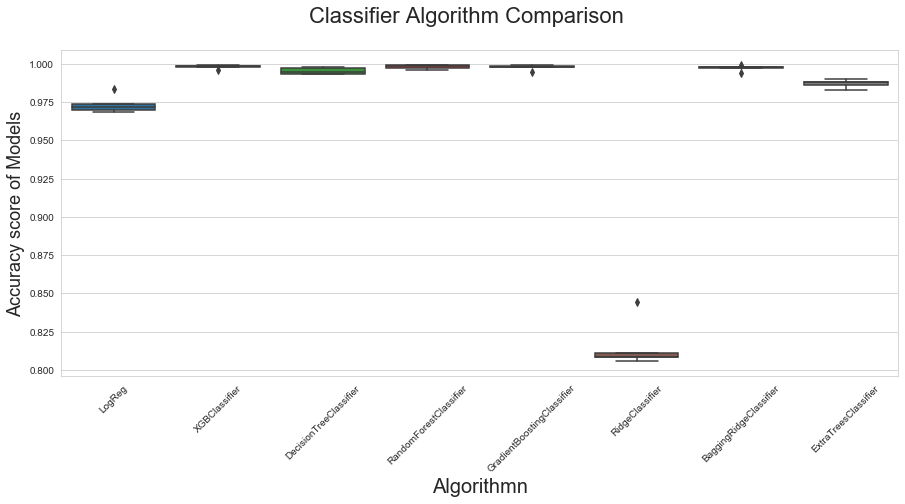

In [113]:
clfs = []
seed = 3
clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

LogReg: 0.998720 (+/- 0.000376)
XGBClassifier: 0.998557 (+/- 0.000794)
DecisionTreeClassifier: 0.993763 (+/- 0.001754)
RandomForestClassifier: 0.998268 (+/- 0.001186)
GradientBoostingClassifier: 0.998807 (+/- 0.000742)
RidgeClassifier: 0.821235 (+/- 0.053737)
BaggingRidgeClassifier: 0.996761 (+/- 0.002338)
ExtraTreesClassifier: 0.994486 (+/- 0.001542)


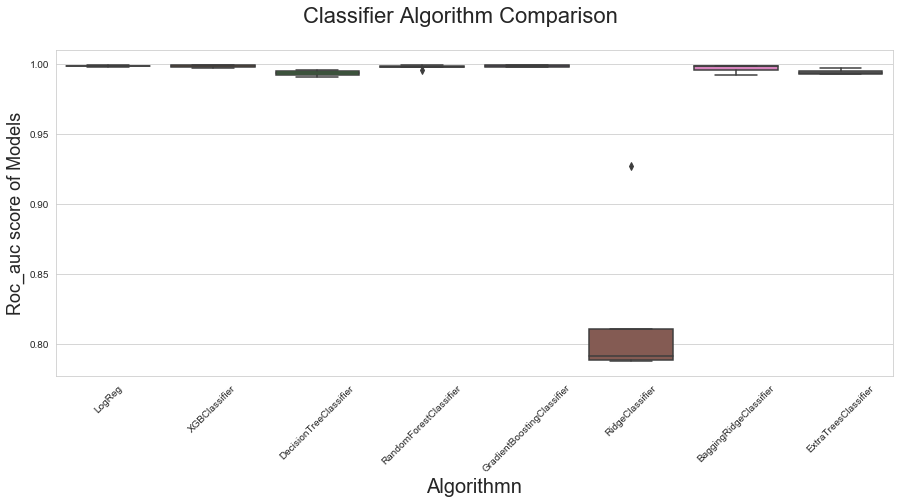

In [114]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'roc_auc'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Roc_auc score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

LogReg: 0.983670 (+/- 0.003292)
XGBClassifier: 0.998617 (+/- 0.000625)
DecisionTreeClassifier: 0.997009 (+/- 0.001165)
RandomForestClassifier: 0.998690 (+/- 0.000784)
GradientBoostingClassifier: 0.998398 (+/- 0.000880)
RidgeClassifier: 0.896603 (+/- 0.007416)
BaggingRidgeClassifier: 0.998179 (+/- 0.000977)
ExtraTreesClassifier: 0.991877 (+/- 0.001594)


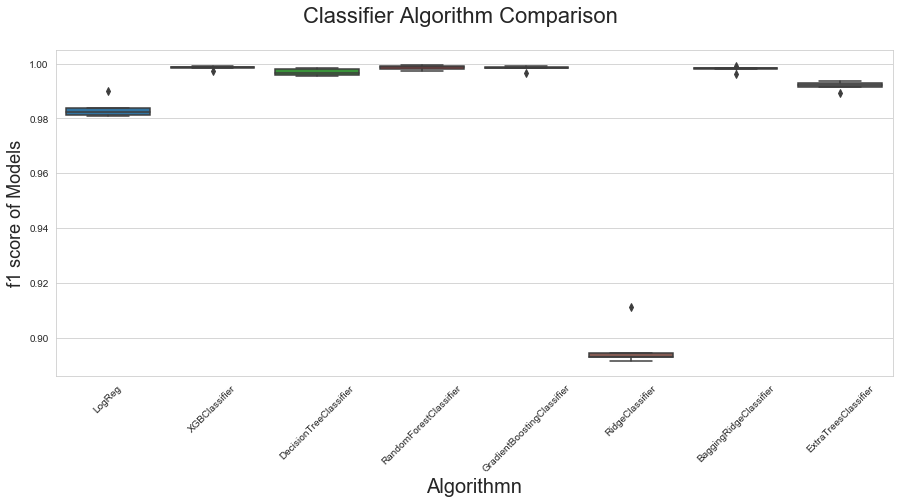

In [115]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'f1'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("f1 score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()